# Unit 1 Capstone
<div style="text-align: right"> AE Simpson </div>

## The main component of this capstone is a research proposal. Using the data set you selected, propose and outline an experiment plan. The plan should consist of three key components:
> - Analysis that highlights your experimental hypothesis.
> - A rollout plan showing how you would implement and rollout the experiment.
> - An evaluation plan showing what constitutes success in this experiment.
___

## The Data
> The City of Chicago provides a considerable amount of open data for its citizens to explore.
As a commuter, I've chosen to focus on data for <b>the Chicago Transit Authority (CTA) public train system (also known as the ‘L’ trains).</b> 

> This dataset lists monthly station entry averages, by day type (Weekday, Saturday or Sunday/Holiday), as well as monthly totals, beginning in 2001 up to June of 2018. Direct source (https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Monthly-Day-Type-A/t2rn-p8d7).
Since this dataset is focused on individual stops, <a href="https://en.wikipedia.org/wiki/List_of_Chicago_%22L%22_stations"
    title="With a Title">here is a link</a> showing the 8 lines, a breakdown of which are the most popular lines, and which lines pass through each stop (since some stops have multiple lines). Below is an SVG image of the entire CTA 'L' line routes. 
    
<img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Chicago_L_diagram_sb.svg">
    
___

In [1]:
# Make code toggle-able for easier review.
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<i>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a></i>.''')

## Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
# %matplotlib notebook
import scipy.stats

In [3]:
# See what the data looks like
df = pd.read_csv('CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals.csv')
df.head(2)

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,01/01/2001,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,01/01/2001,1489.1,1054.0,718.0,40567


#### Now that we can see what the data looks like, below I'm going to get information on the data like types and retrieve statistical data like averages.

In [4]:
print(df.columns)
print(df.shape)
print(df.dtypes)
df.describe()

Index(['station_id', 'stationame', 'month_beginning', 'avg_weekday_rides',
       'avg_saturday_rides', 'avg_sunday-holiday_rides', 'monthtotal'],
      dtype='object')
(29892, 7)
station_id                    int64
stationame                   object
month_beginning              object
avg_weekday_rides           float64
avg_saturday_rides          float64
avg_sunday-holiday_rides    float64
monthtotal                    int64
dtype: object


,station_id,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
count,29892.000000,29892.000000,29892.000000,29892.000000,29892.000000
mean,40761.534190,3899.328964,2269.072598,1648.830366,100694.130670
std,445.912457,3336.978522,2292.767695,1790.051933,87401.214216
min,40010.000000,0.000000,0.000000,0.000000,0.000000
25%,40370.000000,1466.950000,816.200000,555.800000,37899.500000
50%,40750.000000,2958.100000,1475.400000,1021.900000,74995.000000
75%,41150.000000,5115.825000,2914.800000,2052.325000,132291.750000
max,41700.000000,24041.400000,19171.300000,15982.000000,670496.000000


In [5]:
df['stationame'].nunique()

148

In [6]:
df['date_time'] = pd.to_datetime(df['month_beginning'])
df['year'] = df['date_time'].dt.year
df.head(2)

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,date_time,year
0,40900,Howard,01/01/2001,6233.9,3814.5,2408.6,164447,2001-01-01,2001
1,41190,Jarvis,01/01/2001,1489.1,1054.0,718.0,40567,2001-01-01,2001


Text(0.5, 1.0, 'Weekly Rides 2001 - 2018')

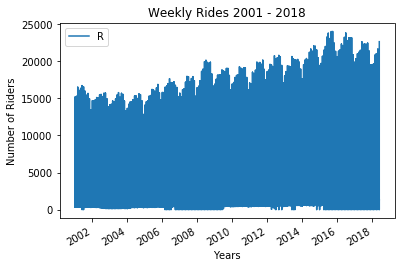

In [7]:
# df.plot(x='year', y='monthtotal')
# plt.legend('Riders')
# plt.xlabel('Years')
# plt.ylabel('Number of Riders')
# plt.title('Monthly Averages')

ax = df.plot(x ='date_time', y='avg_weekday_rides')
plt.legend('Riders')
plt.xlabel('Years')
plt.ylabel('Number of Riders')
plt.title('Weekly Rides 2001 - 2018')

#### Let's look at monthly instead of weekly totals by year to easily see the ridership trend. I'm removing the 2018 data since the year isn't over.

In [8]:
#remove 2018 data, and group each year
year17 = df[(df['date_time'] >= '01/01/2001') & (df['date_time'] < '12/31/2017')]
Year_Group = year17.groupby(['year'])
#Year_Group.groups

In [9]:
# Sort the years by most recent into their own data frame, and get yearly totals
Year_Totals = pd.DataFrame(Year_Group['monthtotal'].sum())
Year_Totals.sort_index(ascending=False).head()

,monthtotal
year,
2017,188665453
2016,195555726
2015,198041408
2014,194826886
2013,186706697


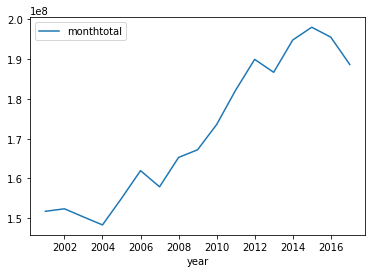

In [10]:
Year_Totals.reset_index().plot(x='year', y='monthtotal')

#### Ridership increased tremendously until about 2015, and now is on a decline.

In [11]:
#Get total rides by station
Station_Group = df.groupby(['stationame'])

#total rides for each station
Station_Group['monthtotal'].sum().head()

stationame
18th                   8044284
35-Bronzeville-IIT    11764360
35th/Archer           14372574
43rd                   5335842
47th-Dan Ryan         16701543
Name: monthtotal, dtype: int64

In [12]:
#get the monthly totals for each station and then sort it from highest totals to least
Station_Totals = pd.DataFrame(Station_Group['monthtotal'].sum())
Station_Totals.sort_values(ascending=False,by='monthtotal',inplace=True)

#save thetop 25 and bottom 25 into variables to call on and plot
top25_stations = Station_Totals.head(25)
bottom25_stations = Station_Totals.tail(25)

#### These are the stations with the most and least amount of riders

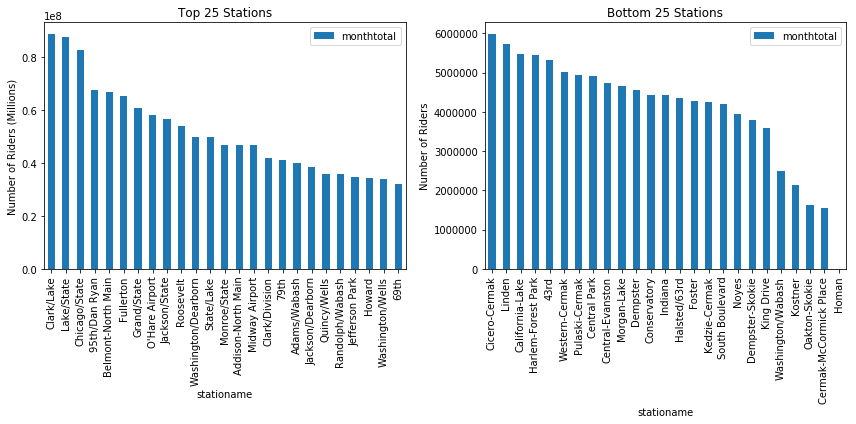

In [23]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(12, 6))


top25_stations.plot(kind='bar',rot=90, ax=ax)
ax.set_title("Top 25 Stations")
ax.set_ylabel('Number of Riders (Millions)')

bottom25_stations.plot(kind='bar',rot=90, ax=ax2)
ax2.set_title("Bottom 25 Stations")
ax2.set_ylabel('Number of Riders')

plt.tight_layout()

#### The two stations to focus on: 95th/Dan Ryan and Harlem-Forest Park

In [14]:
DanRyan_station = df[df['stationame'] == '95th/Dan Ryan']
print(DanRyan_station.head(2))
DanRyan_station.describe()

     station_id     stationame month_beginning  avg_weekday_rides  \
33        40450  95th/Dan Ryan      01/01/2001            14162.6   
175       40450  95th/Dan Ryan      02/01/2001            14445.6   

     avg_saturday_rides  avg_sunday-holiday_rides  monthtotal  date_time  year  
33               7472.8                    4914.4      366040 2001-01-01  2001  
175              7166.5                    5282.8      338708 2001-02-01  2001  


,station_id,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,year
count,209.0,209.000000,209.000000,209.000000,209.000000,209.000000
mean,40450.0,12514.170813,7363.752632,5503.402392,324524.645933,2009.239234
std,0.0,2216.676352,1230.178676,965.675712,56170.226696,5.073516
min,40450.0,0.000000,0.000000,0.000000,0.000000,2001.000000
25%,40450.0,11511.400000,7068.400000,5127.800000,302029.000000,2005.000000
50%,40450.0,13014.400000,7568.800000,5547.700000,337279.000000,2009.000000
75%,40450.0,13850.800000,8037.300000,6047.800000,356173.000000,2014.000000
max,40450.0,15902.900000,9312.400000,7872.800000,410738.000000,2018.000000


In [15]:
HForestPark_station = df[df['stationame'] == 'Harlem-Forest Park']
print(HForestPark_station.head(2))
HForestPark_station.describe()

     station_id          stationame month_beginning  avg_weekday_rides  \
73        40980  Harlem-Forest Park      01/01/2001              785.7   
215       40980  Harlem-Forest Park      02/01/2001              802.3   

     avg_saturday_rides  avg_sunday-holiday_rides  monthtotal  date_time  year  
73                377.0                     233.4       19961 2001-01-01  2001  
215               390.3                     276.3       18711 2001-02-01  2001  


,station_id,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,year
count,210.0,210.000000,210.000000,210.000000,210.000000,210.000000
mean,40980.0,1013.570000,575.597619,405.034286,26007.190476,2009.257143
std,0.0,167.539364,101.389865,93.742030,4442.783611,5.068013
min,40980.0,703.000000,377.000000,233.400000,17969.000000,2001.000000
25%,40980.0,872.675000,502.925000,333.325000,22320.500000,2005.000000
50%,40980.0,991.150000,561.500000,393.000000,25484.500000,2009.000000
75%,40980.0,1148.850000,650.800000,470.850000,29489.000000,2014.000000
max,40980.0,1376.500000,839.800000,690.800000,35756.000000,2018.000000


## The Problem
> Over the last 10 years, the overall ridership of the Chicago Transit Authority (CTA) trains has been on an increase until the last two years. Some of the reasoning for the sudden decline has been people relocating out of the city, an increase in telecommuting, and ride share initiatives like Uber and Lyft.
> How can the CTA increase ridership to make ease of mobility in the city of Chicago accessible and desired by all?

## Hypothesis Proposal 
> The CTA should team up with ride share programs like Uber or Lyft to offer customers discounted Uber rate when being picked up from a train station. 

## Rollout 
> The trains in the loop area haven’t seen much decline so the focus should be on popular stations outside of the loop. The redline is the most populous train line with stops from the south side to the north side. The top performing stop outside of the loop is the south side’s 95th/Dan Ryan red line stop. The next most populous line is the Blue line, because of its access to Chicago’s number one airport (O’hare). The blue line has one of the least populated stops (of all the lines) at Harlem – Forest Park on the west side. 

## Evaluation 
> The CTA should offer discounted rates to Uber/Lyft customers getting picked up from those two stops for 2 months (since a single station averages 3,899 riders daily). It will be set up like an A/B test, with the previous recorded ridership as its control group, and the new riders being offered the promotion is the test group. The two groups for the sample will be the red line riders (higher performing stop), and the blue line riders (lower performing stop).

> Other measured variables will include any event that may stop or significantly slow service, like bad weather that affects one or both lines, if there is an accident, if there is construction, etc.

> Key metrics are ridership increases for each group.
If weekday ridership doesn’t increase by 1 standard deviation (95th/Dan Ryan 2216 rides, and Harlem-forest park 168 rides) after 2 months, then get rid of the program, and if it increases by 1 standard deviation, keep the program and expand to other stations.  
If ridership showed an increase by ½ standard deviation or more, continue the trial for another two months. Then refer back to the initial guidelines.
If ridership only increases at one stop, continue the offer to other stops on that line and monitor which areas of that line react well. For the other line that doesn’t take on to the program, stop the trial and consider trying another line.